# 🛍️ Mall Customer Segmentation using KMeans Clustering

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [2]:
# 2. Load Dataset
data_path = "mall_customers.csv"
df = pd.read_csv(data_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# 3. Dataset Overview
print("Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nInfo:")
df.info()
print("\nDescription:")
df.describe()

Shape: (1000, 5)

Columns: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1000 non-null   int64 
 1   Gender                  1000 non-null   object
 2   Age                     1000 non-null   int64 
 3   Annual Income (k$)      1000 non-null   int64 
 4   Spending Score (1-100)  1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB

Description:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,103.359000,39.053000,61.630000,50.83700
std,57.676813,13.621517,26.020033,26.06649
min,1.000000,18.000000,15.000000,1.00000
25%,53.000000,29.000000,43.000000,35.00000
50%,105.500000,36.000000,62.000000,50.00000
75%,152.000000,49.000000,78.000000,73.00000
max,200.000000,70.000000,137.000000,99.00000


C:\Users\Amit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


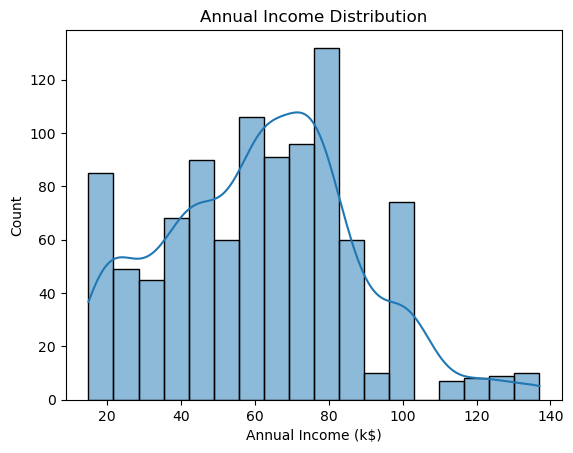

C:\Users\Amit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


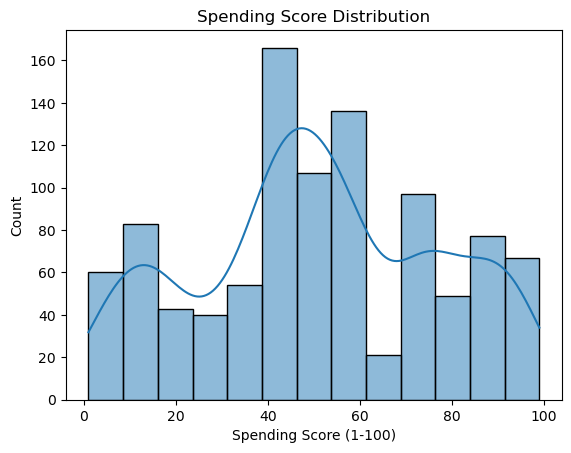

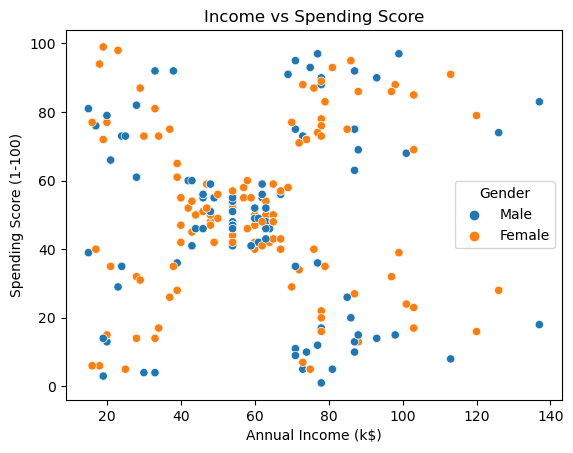

In [4]:
# 4. EDA - Visualizing Distributions
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title("Annual Income Distribution")
plt.show()

sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title("Spending Score Distribution")
plt.show()

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title("Income vs Spending Score")
plt.show()


In [5]:
# 5. Preprocessing
features = df[["Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

C:\Users\Amit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Amit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Amit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Amit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

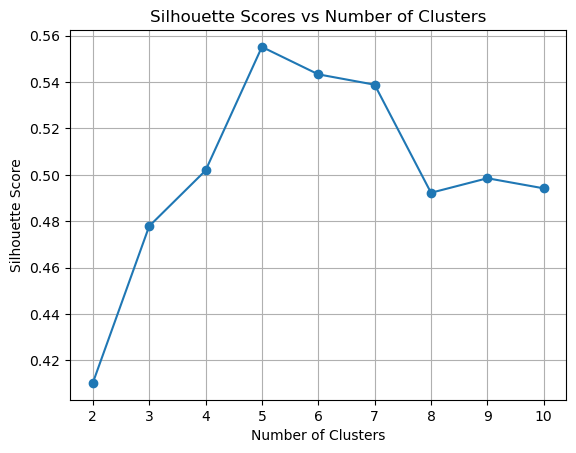

In [6]:
# 6. Silhouette Analysis to find optimal K
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sil_score = silhouette_score(scaled_features, kmeans.labels_)
    sil_scores.append(sil_score)

plt.plot(range(2, 11), sil_scores, marker='o')
plt.title("Silhouette Scores vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [7]:
# 7. Final Model Training
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_features)
cluster_labels = kmeans.predict(scaled_features)
df['Cluster'] = cluster_labels

C:\Users\Amit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# 8. Save Model and Scaler
os.makedirs("model", exist_ok=True)
with open("model/kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)
with open("model/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

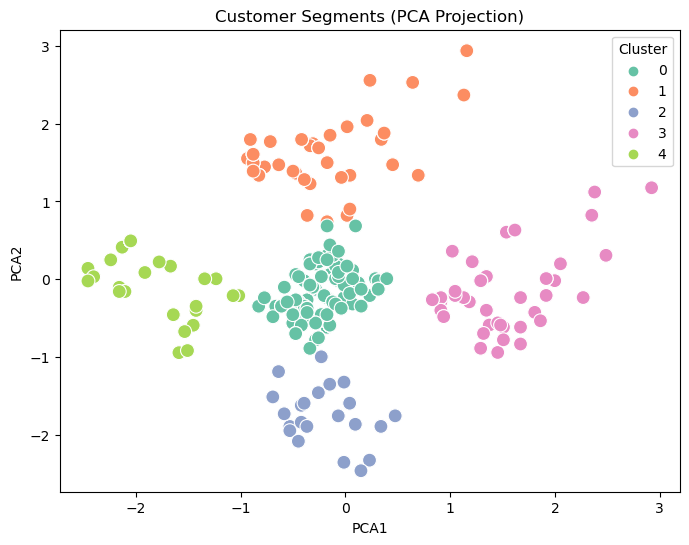

In [8]:
# 9. Visualizing Clusters using PCA
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=100)
plt.title("Customer Segments (PCA Projection)")
plt.show()

In [9]:
# 10. Final Output
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,PCA1,PCA2
0,1,Male,19,15,39,4,-1.589090,-0.946563
1,2,Male,21,15,81,2,-0.449184,-2.086469
2,3,Female,20,16,6,4,-2.457541,-0.023734
3,4,Female,23,16,77,2,-0.530557,-1.950717
4,5,Female,31,17,40,4,-1.507571,-0.919325
